<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>

Decided not to copy the practical1 code here, so that it doesn't turn into a mess. :)

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [258]:
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
%matplotlib inline

df = pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
df_agg = df.sum(axis = 1)

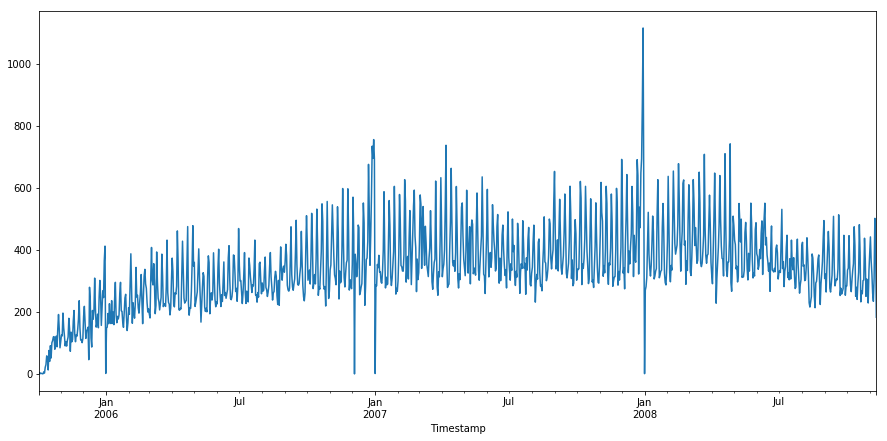

In [28]:
df_agg.plot(figsize=(15,7))

Looking at the aggregate data we see that we don't have trend and seasonality in our data.

In [76]:
train_df = df_agg.loc[:'01.01.2008']
validation_df = df_agg.loc[:'06.01.2008']
test_df = df_agg.loc['06.01.2008':]

In [32]:
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

In [33]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
        FORECAST[t+h] = y
    return FORECAST


def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST


def WintersExponentialSmoothing(x, h, Params):
    x = np.array(x)
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality']
    
    FORECAST = [np.NaN]*(T+h) 
    
    l = np.mean(x[:p])
    s = x[:p]-l 
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= np.mean(x[cntr:cntr+p]) 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] - l 
            old_l = l
            l = (1-alpha)*l + alpha*(x[cntr]-s[cntr % p]) 
            s[cntr % p] = (1-gamma)*s[cntr % p] + gamma*(x[cntr] - old_l) 
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST


def TheilWageModel(x, h, Params):
    x = np.array(x)
    T = len(x)
    alpha = Params['alpha']
    betta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality']

    FORECAST = [np.NaN]*(T+h)

    l = np.mean(x[:p])         
    t = np.mean(x[p:2*p] - x[:p])/p 
    s = x[:p]-l                

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.mean(x[cntr:cntr+p]) 
            if math.isnan(s[cntr % p]):
                s[t % p] = x[cntr] - l 
            old_l = l      
            old_t = t
            l = alpha*(x[cntr]-s[cntr % p]) + (1-alpha)*(l+t)
            t = betta*(l - old_l) + (1-betta)*t
            s[cntr % p] = gamma*(x[cntr] - old_l - old_t) + (1-gamma)*s[cntr % p] 
            
        FORECAST[cntr+h] = l + h*t + s[(cntr+h) % p]
    return FORECAST

In [101]:
def param_finding(df, model):
    Params = {}
    best_params = {}
    h = 1
    start = df.index[-1]+timedelta(1)
    end = df.index[-1]+timedelta(h)
    rng = pd.date_range(start, end)
    frc_df = pd.DataFrame(index = df.index.append(rng), columns = df.columns)
    ix = range(len(df.index))
    
    ALPHA = list(np.linspace(start=0, stop=1, num=15))
    GAMMA = list(np.linspace(start=0, stop=1, num=15))
    BETA = list(np.linspace(start=0, stop=1, num=15))
    if(model == 'IES'):
        frc_IES = []
        loss_IES = np.zeros(shape=len(ALPHA))
        
        for alpha in ALPHA:
            Params['alpha']=alpha
            Params['AdaptationPeriod'] = 30
            for cntr in df.columns:
                frc_df[cntr] = InitExponentialSmoothing(df[cntr], h, Params)

            loss,_ = qualityMACAPE(df.iloc[ix], frc_df.iloc[ix])
            loss_IES[ALPHA.index(alpha)] = loss
        alpha_m = np.where(loss_IES == np.min(loss_IES))[0][0]
        alpha_min = ALPHA[alpha_m]
        best_params['alpha'] = alpha_min
        best_params['AdaptationPeriod'] = Params['AdaptationPeriod']
    elif(model == 'AES'):
        frc_AES = []
        loss_AES = np.zeros(shape=(len(ALPHA),len(GAMMA)))
        
        for alpha in ALPHA:
            for gamma in GAMMA:
                Params['alpha']=alpha
                Params['gamma']=gamma
                Params['AdaptationPeriod'] = 30
                for cntr in df.columns:
                    frc_df[cntr] = AdaptiveExponentialSmoothing(df[cntr], h, Params)

                loss,_ = qualityMACAPE(df.iloc[ix], frc_df.iloc[ix])
                loss_AES[ALPHA.index(alpha)][GAMMA.index(gamma)] = loss
        alpha_m = np.where(loss_AES == np.min(loss_AES))[0][0]
        gamma_m = np.where(loss_AES == np.min(loss_AES))[1][0]
        alpha_min = ALPHA[alpha_m]
        gamma_min = GAMMA[gamma_m]
        best_params['alpha'] = alpha_min
        best_params['gamma'] = gamma_min
        best_params['AdaptationPeriod'] = Params['AdaptationPeriod']
    elif(model == 'WES'):
        frc_WES = []
        loss_WES = np.zeros(shape=(len(ALPHA),len(GAMMA)))
        
        for alpha in ALPHA:
            for gamma in GAMMA:
                Params['alpha']=alpha
                Params['gamma']=gamma
                Params['seasonality'] = 7
                for cntr in df.columns:
                    frc_df[cntr] = WintersExponentialSmoothing(df[cntr], h, Params)

                loss,_ = qualityMACAPE(df.iloc[ix], frc_df.iloc[ix])
                loss_WES[ALPHA.index(alpha)][GAMMA.index(gamma)] = loss
        alpha_m = np.where(loss_WES == np.min(loss_WES))[0][0]
        gamma_m = np.where(loss_WES == np.min(loss_WES))[1][0]
        alpha_min = ALPHA[alpha_m]
        gamma_min = GAMMA[gamma_m]
        best_params['alpha'] = alpha_min
        best_params['gamma'] = gamma_min
        best_params['seasonality'] = Params['seasonality']
    elif(model == 'TWM'):
        frc_TWM = []
        loss_TWM = np.zeros(shape=(len(ALPHA),len(BETA),len(GAMMA)))
        
        for alpha in ALPHA:
            for beta in BETA:
                for gamma in GAMMA:
                    Params['alpha']=alpha
                    Params['beta']=beta
                    Params['gamma']=gamma
                    Params['seasonality'] = 7
                    for cntr in df.columns:
                        frc_df[cntr] = TheilWageModel(df[cntr], h, Params)

                    loss,_ = qualityMACAPE(df.iloc[ix], frc_df.iloc[ix])
                    loss_TWM[ALPHA.index(alpha)][BETA.index(beta)][GAMMA.index(gamma)] = loss
        alpha_m = np.where(loss_TWM == np.min(loss_TWM))[0][0]
        beta_m = np.where(loss_TWM == np.min(loss_TWM))[1][0]
        gamma_m = np.where(loss_TWM == np.min(loss_TWM))[2][0]
        alpha_min = ALPHA[alpha_m]
        beta_min = BETA[beta_m]
        gamma_min = GAMMA[gamma_m]
        best_params['alpha'] = alpha_min
        best_params['beta'] = beta_min
        best_params['gamma'] = gamma_min
        best_params['seasonality'] = Params['seasonality']
        
    return best_params

Initial Exponensial Smoothing parameters:

In [102]:
param_finding(train_df.to_frame(),'IES')

{'AdaptationPeriod': 30, 'alpha': 0.071428571428571425}

Adaptive Exponensial Smoothing parameters:

In [104]:
param_finding(train_df.to_frame(),'AES')

{'AdaptationPeriod': 30, 'alpha': 0.071428571428571425, 'gamma': 0.0}

Winters Exponensial Smoothing parameters:

In [105]:
param_finding(train_df.to_frame(),'WES')

{'alpha': 0.2857142857142857, 'gamma': 1.0, 'seasonality': 7}

Theil Wage Model parameters:

In [106]:
param_finding(train_df.to_frame(),'TWM')

{'alpha': 0.8571428571428571,
 'beta': 0.14285714285714285,
 'gamma': 0.8571428571428571,
 'seasonality': 7}

In [337]:
l_esm = []
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    l_esm.append(param_finding(temp.to_frame(),'IES'))

In [338]:
print(l_esm)

[{'alpha': 0.0, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.14285714285714285, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 1.0, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 1.0, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30}, {'alpha': 0.0714285714285

In [318]:
l_aes = []
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    l_aes.append(param_finding(temp.to_frame(),'AES'))

In [357]:
print(l_aes)

[{'alpha': 0.0, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.14285714285714285, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 1.0, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 1.0}, {'alpha': 0.071428571428571425, 'AdaptationPeriod': 30, 'gamma': 0.0}, {'alpha': 0.071428571428571425, 'Adaptat

In [321]:
l_wes = []
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    l_wes.append(param_finding(temp.to_frame(),'WES'))

In [322]:
print(l_wes)

[{'alpha': 0.92857142857142849, 'gamma': 0.7857142857142857, 'seasonality': 7}, {'alpha': 0.92857142857142849, 'gamma': 0.071428571428571425, 'seasonality': 7}, {'alpha': 0.5714285714285714, 'gamma': 1.0, 'seasonality': 7}, {'alpha': 0.3571428571428571, 'gamma': 0.8571428571428571, 'seasonality': 7}, {'alpha': 0.5714285714285714, 'gamma': 0.64285714285714279, 'seasonality': 7}, {'alpha': 1.0, 'gamma': 0.64285714285714279, 'seasonality': 7}, {'alpha': 1.0, 'gamma': 0.5714285714285714, 'seasonality': 7}, {'alpha': 0.64285714285714279, 'gamma': 0.8571428571428571, 'seasonality': 7}, {'alpha': 0.92857142857142849, 'gamma': 1.0, 'seasonality': 7}, {'alpha': 0.8571428571428571, 'gamma': 0.2857142857142857, 'seasonality': 7}, {'alpha': 0.8571428571428571, 'gamma': 1.0, 'seasonality': 7}, {'alpha': 1.0, 'gamma': 0.3571428571428571, 'seasonality': 7}, {'alpha': 0.64285714285714279, 'gamma': 0.21428571428571427, 'seasonality': 7}, {'alpha': 0.92857142857142849, 'gamma': 1.0, 'seasonality': 7}, {

In [323]:
l_twm = []
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    l_twm.append(param_finding(temp.to_frame(),'TWM'))

In [324]:
print(l_twm)

[{'alpha': 0.2857142857142857, 'beta': 0.2857142857142857, 'gamma': 0.7857142857142857, 'seasonality': 7}, {'alpha': 0.7857142857142857, 'beta': 0.14285714285714285, 'gamma': 0.92857142857142849, 'seasonality': 7}, {'alpha': 0.071428571428571425, 'beta': 0.8571428571428571, 'gamma': 0.42857142857142855, 'seasonality': 7}, {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.14285714285714285, 'seasonality': 7}, {'alpha': 0.5, 'beta': 0.071428571428571425, 'gamma': 0.42857142857142855, 'seasonality': 7}, {'alpha': 0.7857142857142857, 'beta': 0.8571428571428571, 'gamma': 0.071428571428571425, 'seasonality': 7}, {'alpha': 0.071428571428571425, 'beta': 0.21428571428571427, 'gamma': 0.3571428571428571, 'seasonality': 7}, {'alpha': 1.0, 'beta': 0.0, 'gamma': 1.0, 'seasonality': 7}, {'alpha': 0.71428571428571419, 'beta': 0.071428571428571425, 'gamma': 1.0, 'seasonality': 7}, {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5, 'seasonality': 7}, {'alpha': 0.071428571428571425, 'beta': 0.92857142857142849, 'gamma': 0.

In [369]:
def forecast_all(df, model, params):
    params_all = {}
    h = 1
    rng = pd.date_range(df.index[-1]+timedelta(1), df.index[-1]+timedelta(h))
    frc = pd.DataFrame(index = df.index.append(rng), columns = df.columns)
    if model == 'InitExponentialSmoothing':
        params_all['alpha'] = params['alpha']
        params_all['AdaptationPeriod'] = params['AdaptationPeriod']
        for cntr in df.columns:
            frc[cntr] = InitExponentialSmoothing(df[cntr], h, params_all)
    elif model == 'AdaptiveExponentialSmoothing':
        params_all['alpha'] = params['alpha']
        params_all['gamma'] = params['gamma']
        params_all['AdaptationPeriod'] = params['AdaptationPeriod']
        for cntr in df.columns:
            frc[cntr] = AdaptiveExponentialSmoothing(df[cntr], h, params_all)
    elif model == 'WintersExponentialSmoothing':
        params_all['alpha'] = params['alpha']
        params_all['gamma'] = params['gamma']
        params_all['seasonality'] = params['seasonality']
        for cntr in df.columns:
            frc[cntr] = WintersExponentialSmoothing(df[cntr], h, params_all)
    elif model == 'TheilWageModel':
        params_all['alpha'] = params['alpha']
        params_all['beta'] = params['beta']
        params_all['gamma'] = params['gamma']
        params_all['seasonality'] = params['seasonality']
        for cntr in df.columns:
            frc[cntr] = TheilWageModel(df[cntr], h, params_all)
   
    return frc

In [344]:
f_esm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    f_esm.append(forecast_all(temp.to_frame(),'InitExponentialSmoothing',l_esm[ind]))
    ind += 1

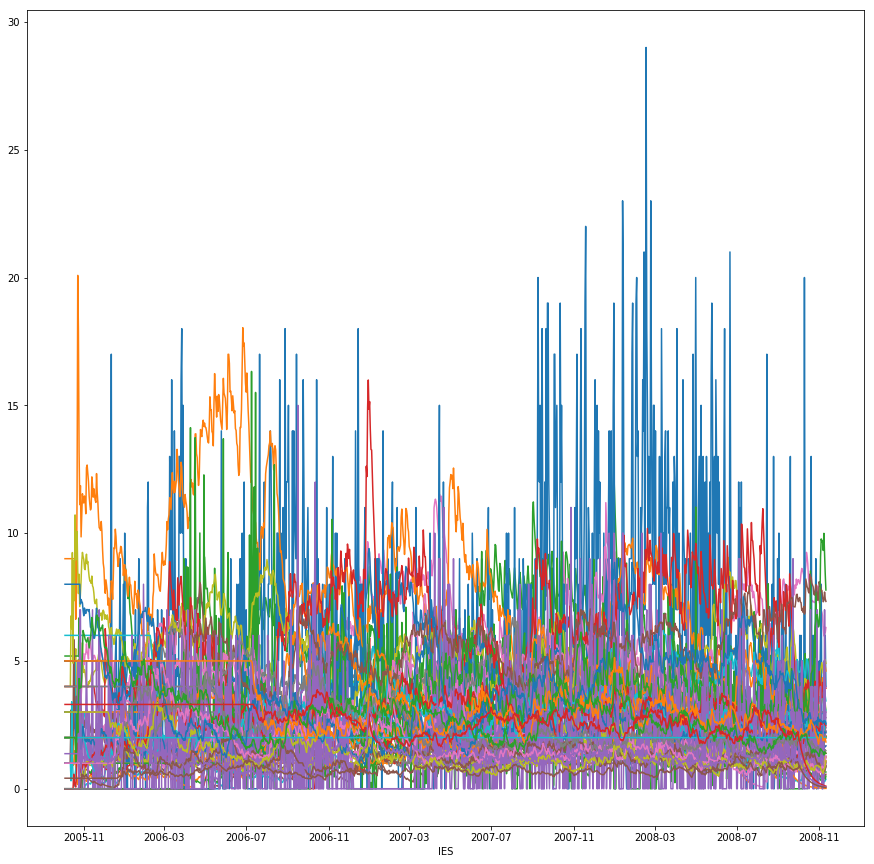

In [374]:
plt.figure(figsize=(15,15))
for i in range(len(f_esm)):
    plt.plot(f_esm[i])
    plt.xlabel('IES')
plt.show()

In [386]:
f_asm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    f_asm.append(forecast_all(temp.to_frame(),'AdaptiveExponentialSmoothing',l_aes[ind]))
    ind += 1

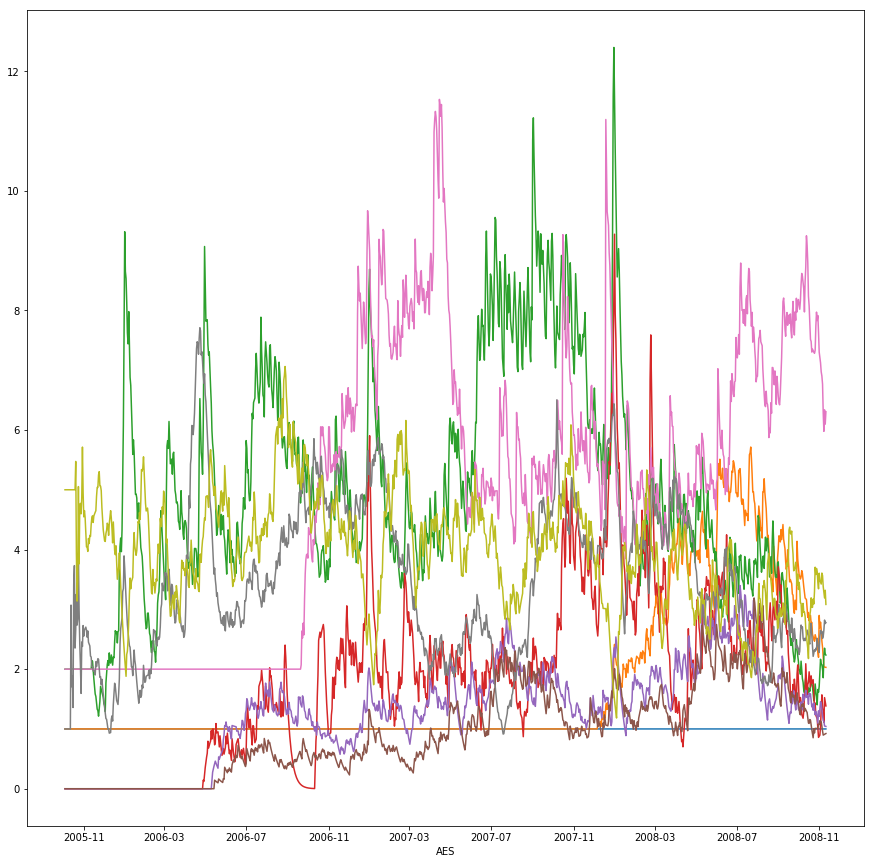

In [387]:
plt.figure(figsize=(15,15))
for i in range(len(f_asm)-47):
    plt.plot(f_asm[i])
    plt.xlabel('AES')
plt.show()

In [366]:
f_wsm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    f_wsm.append(forecast_all(temp.to_frame(),'WintersExponentialSmoothing',l_wes[ind]))
    ind += 1

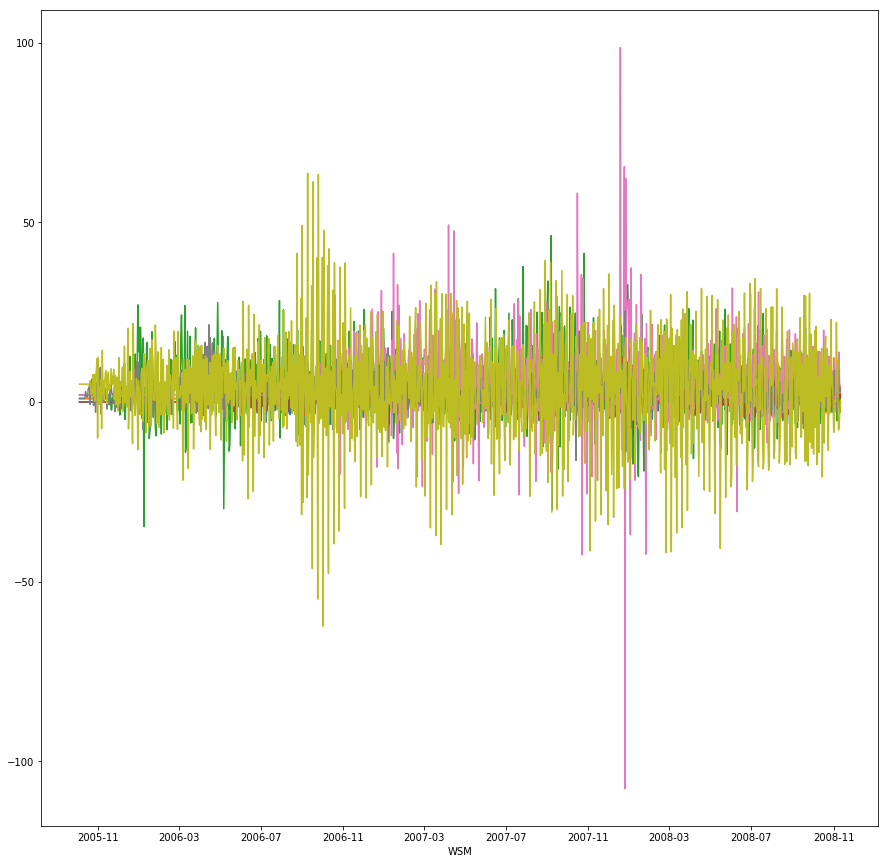

In [373]:
plt.figure(figsize=(15,15))
for i in range(len(f_wsm)-47):
    plt.plot(f_wsm[i])
    plt.xlabel('WSM')
plt.show()

In [370]:
f_twm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    f_twm.append(forecast_all(temp.to_frame(),'TheilWageModel',l_twm[ind]))
    ind += 1

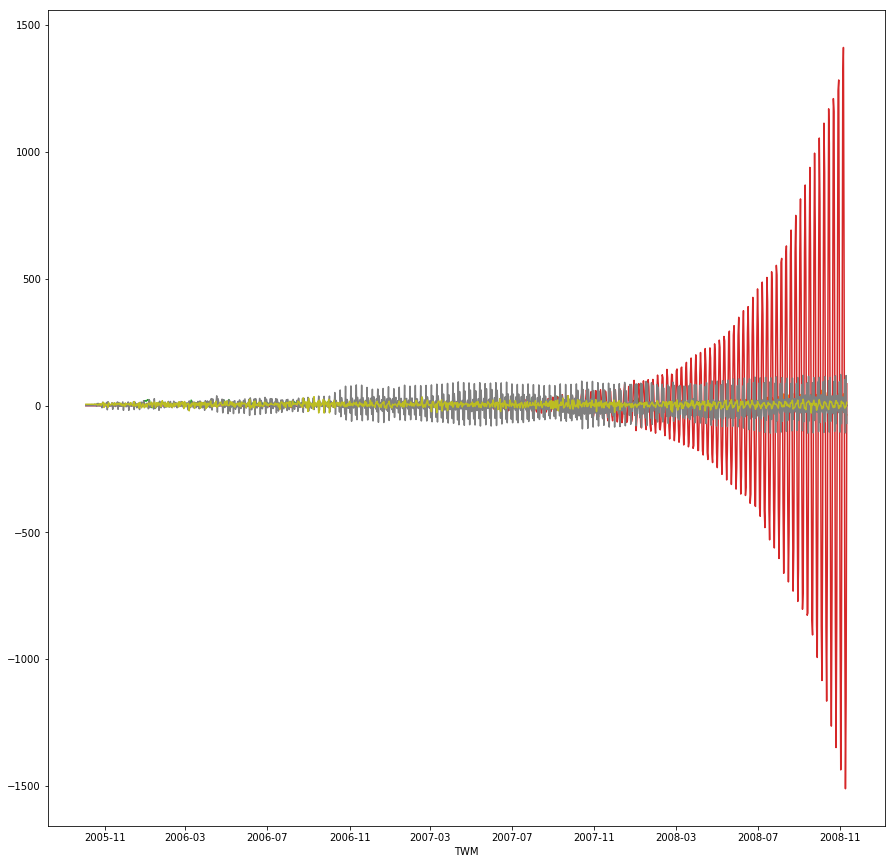

In [371]:
plt.figure(figsize=(15,15))
for i in range(len(f_twm)-47):
    plt.plot(f_twm[i])
    plt.xlabel('TWM')
plt.show()

In [380]:
frc_esm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    frc_esm.append(qualityMACAPE(temp.to_frame(), f_esm[ind])[0][0])                       
    ind += 1

In [389]:
frc_asm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    frc_asm.append(qualityMACAPE(temp.to_frame(), f_asm[ind])[0][0])                       
    ind += 1

In [395]:
frc_wsm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    frc_wsm.append(qualityMACAPE(temp.to_frame(), f_wsm[ind])[0][0])                       
    ind += 1

In [396]:
frc_twm = []
ind = 0
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    frc_twm.append(qualityMACAPE(temp.to_frame(), f_twm[ind])[0][0])                       
    ind += 1

In [417]:
data_frc

,IES,AES,WES,TWM
0,0.742969,0.742969,-4.989264,-2.233780e+02
1,0.186341,0.186341,-22.892746,-4.940518e+01
2,0.788308,0.788308,-10.919458,-1.380730e+03
3,0.820590,0.820590,-37.313398,-9.706034e+12
4,0.978546,0.978546,-53.485290,-3.064591e+02
5,1.170547,1.170547,-8.755728,-3.654737e+02
6,0.411961,0.411961,-7.070803,-4.166197e+02
7,0.615701,0.615701,-3.205272,-4.467857e+12
8,0.709765,0.709765,-173.289508,-8.268806e+02
9,0.731367,0.731367,-33.161384,-1.395130e+03


In [416]:
df_frc = zip(frc_esm, frc_asm, frc_wsm, frc_twm)
labels = ['IES', 'AES', 'WES', 'TWM']
data_frc = pd.DataFrame.from_records(df_frc, columns=labels)
data_min = data_frc.idxmin(axis=1, skipna=True).to_frame()
data_min = data_min.rename(columns={0: 'Best_Model'})
data_min

,Best_Model
0,TWM
1,TWM
2,TWM
3,TWM
4,TWM
5,TWM
6,TWM
7,TWM
8,TWM
9,TWM


The dataframe above shows the best model for each TS.

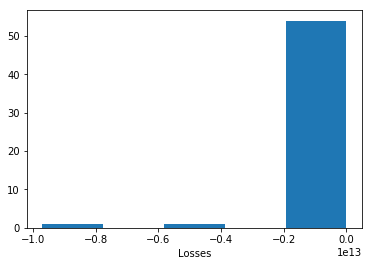

In [425]:
best_forcast = []
best_forcast = frc_twm
best_forcast[41] = frc_wsm[41]
best_forcast[42] = frc_wsm[42]
best_forcast[43] = frc_wsm[43]
plt.hist(best_forcast, normed=False, bins=5)
plt.xlabel('Losses')

In [426]:
frc_esm_part = []
ind = 0
for i in df.loc['06.01.2008':].iloc[:,np.arange(1,57)]:
    temp = df.loc['06.01.2008':][i]
    frc_esm_part.append(qualityMACAPE(temp.to_frame(), f_esm[ind])[0][0])                       
    ind += 1

In [427]:
frc_asm_part = []
ind = 0
for i in df.loc['06.01.2008':].iloc[:,np.arange(1,57)]:
    temp = df.loc['06.01.2008':][i]
    frc_asm_part.append(qualityMACAPE(temp.to_frame(), f_asm[ind])[0][0])                       
    ind += 1

In [428]:
frc_wsm_part = []
ind = 0
for i in df.loc['06.01.2008':].iloc[:,np.arange(1,57)]:
    temp = df.loc['06.01.2008':][i]
    frc_wsm_part.append(qualityMACAPE(temp.to_frame(), f_wsm[ind])[0][0])                       
    ind += 1

In [429]:
frc_twm_part = []
ind = 0
for i in df.loc['06.01.2008':].iloc[:,np.arange(1,57)]:
    temp = df.loc['06.01.2008':][i]
    frc_twm_part.append(qualityMACAPE(temp.to_frame(), f_twm[ind])[0][0])                       
    ind += 1

In [430]:
df_frc_part = zip(frc_esm, frc_asm, frc_wsm, frc_twm)
labels = ['IES', 'AES', 'WES', 'TWM']
data_frc_part = pd.DataFrame.from_records(df_frc_part, columns=labels)
data_min_part = data_frc.idxmin(axis=1, skipna=True).to_frame()
data_min_part = data_min.rename(columns={0: 'Best_Model'})
data_min_part

,Best_Model
0,TWM
1,TWM
2,TWM
3,TWM
4,TWM
5,TWM
6,TWM
7,TWM
8,TWM
9,TWM


I got the same result as in the previous case. The only difference i that in the latter case I've used the part of data I haven't been using while choosing the parameters, which gives a more realistic picture. 

Let's try to also forcast for the aggregated TS.

In [ ]:
def forecast(df, model, params):
    h = 1
    rng = pd.date_range(df.index[-1]+timedelta(1), df.index[-1]+timedelta(h))
    frc = pd.DataFrame(index = df.index.append(rng), columns = df.columns)
    for cntr in df.columns:
        frc[cntr] = model(df[cntr], h, params)
    return frc

Initial Exponensial Smoothing forecast:

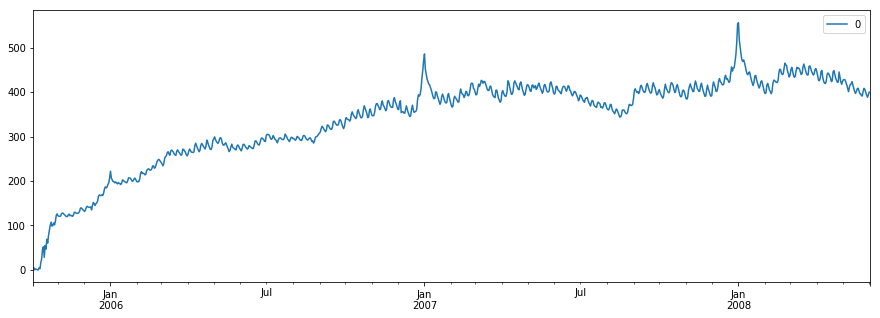

In [124]:
IES_f = forecast(validation_df.to_frame(),InitExponentialSmoothing,{'alpha':0.07, 'AdaptationPeriod': 30})
IES_f.plot(figsize=(15,5))

Adaptive Exponensial Smoothing forecast:

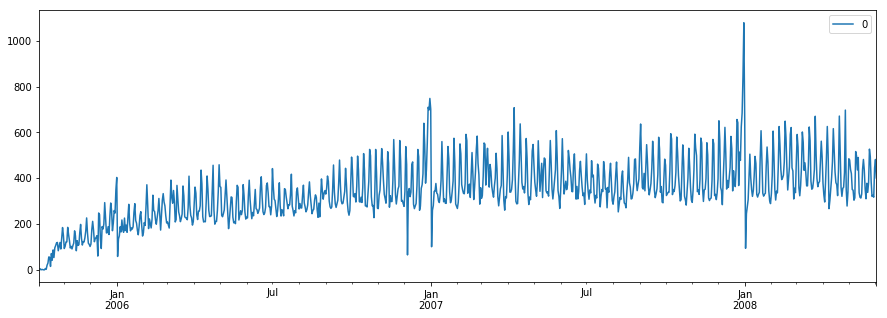

In [125]:
AES_f = forecast(validation_df.to_frame(),AdaptiveExponentialSmoothing,{'alpha':0.8571428571428571,'gamma':0.0, 'AdaptationPeriod': 30})
AES_f.plot(figsize=(15,5))

Winters Exponensial Smoothing forecast:

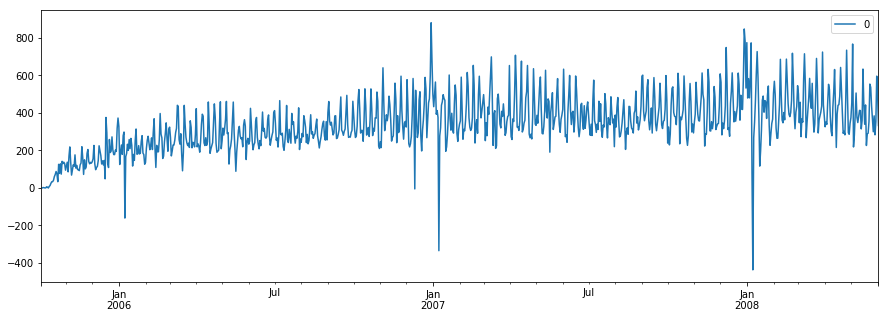

In [126]:
WES_f = forecast(validation_df.to_frame(),WintersExponentialSmoothing,{'alpha':0.28,'gamma':1.0, 'seasonality': 7})
WES_f.plot(figsize=(15,5))

Theil Wage Model forecast:

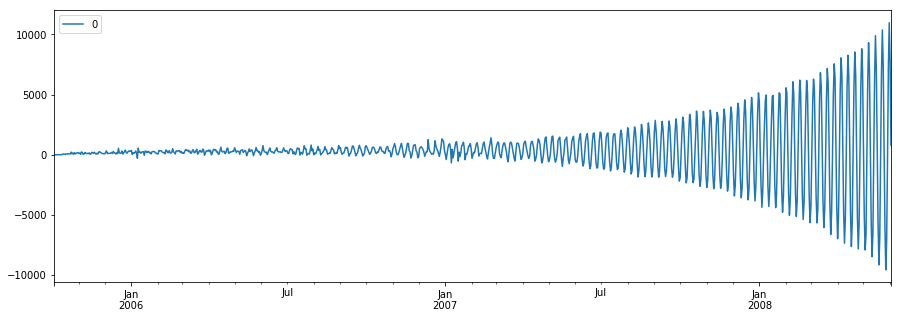

In [127]:
TWM_f = forecast(validation_df.to_frame(),TheilWageModel,{'alpha':0.857,'beta':0.143,'gamma':0.857, 'seasonality': 7})
TWM_f.plot(figsize=(15,5))

In [130]:
qualityMACAPE(test_df.to_frame(), IES_f)[0][0]

0.042658377017000523

In [131]:
qualityMACAPE(test_df.to_frame(), AES_f)[0][0]

0.13648620458547348

In [132]:
qualityMACAPE(test_df.to_frame(), WES_f)[0][0]

0.18942258245302621

In [133]:
qualityMACAPE(test_df.to_frame(), TWM_f)[0][0]

1.253664422149896

Apparently, Initial Exponential Smoothing works better on our dataset.

In [301]:
df = df.dropna(axis=1, how='all')
df = df.fillna(method='ffill')
losses = []
for i in df.iloc[:,np.arange(1,57)]:
    temp = df[i]
    IES_f = forecast(temp.to_frame(),InitExponentialSmoothing,{'alpha':0.07, 'AdaptationPeriod': 30})
    losses.append(qualityMACAPE(temp.to_frame(), IES_f)[0][0])
losses = [float('%.2f' % elem) for elem in losses ]

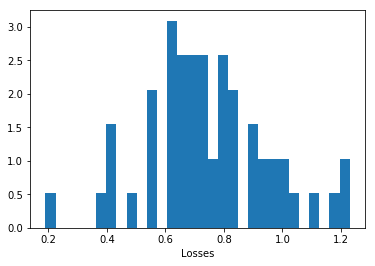

In [302]:
plt.hist(losses, normed=True, bins=30)
plt.xlabel('Losses')

In [310]:
losses = []
for i in df.loc['06.01.2008':].iloc[:,np.arange(1,57)]:
    temp = df.loc['06.01.2008':][i]
    IES_f = forecast(temp.to_frame(),InitExponentialSmoothing,{'alpha':0.07, 'AdaptationPeriod': 30})
    losses.append(qualityMACAPE(temp.to_frame(), IES_f)[0][0])
losses = [float('%.2f' % elem) for elem in losses ]

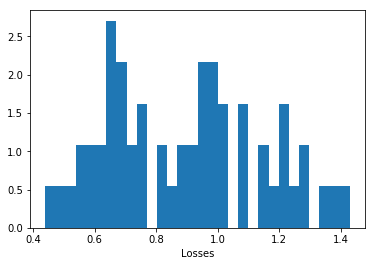

In [311]:
plt.hist(losses, normed=True, bins=30)
plt.xlabel('Losses')

The second histogram gives us more realistic results, because we look at the part of the data which wasn't used for parameter optimiation.